# Configuración

In [29]:
import numpy as np
import pandas as pd
from scipy.stats import kstest, skew, kurtosis, mode
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filename= 'DB_LIMPIA.csv'
data= pd.read_csv(filename, sep=';')
#usecols = ["VIC_SEXO","VIC_EDAD","TOTAL_HIJOS","VIC_ESCOLARIDAD", "VIC_EST_CIV","VIC_GRUPET","VIC_TRABAJA","VIC_DISC","VIC_REL_AGR","OTRAS_VICTIMAS","HEC_DIA","HEC_MES","HEC_ANO","HEC_AREA","HEC_TIPAGRE","INST_DONDE_DENUNCIO","AGR_SEXO","AGR_EDAD","AGR_ESCOLARIDAD","AGR_EST_CIV","AGR_GRUPET","AGR_TRABAJA","INST_DENUN_HECHO","MEDIDAS_SEGURIDAD"]
#df=pd.DataFrame(data)
#data= pd.read_csv(filename, index_col=0, usecols=usecols)

df=pd.DataFrame(data)
df

,Unnamed: 0,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,VIC_ESCOLARIDAD,VIC_EST_CIV,VIC_GRUPET,VIC_TRABAJA,VIC_DISC,VIC_REL_AGR,...,HEC_TIPAGRE,INST_DONDE_DENUNCIO,AGR_SEXO,AGR_EDAD,AGR_ESCOLARIDAD,AGR_EST_CIV,AGR_GRUPET,AGR_TRABAJA,INST_DENUN_HECHO,MEDIDAS_SEGURIDAD
0,0,Mujeres,11,-1,Primaria,Desconocido,Ladino,No,Desconocido,Hijos(as),...,Física-sexual,NaN,Hombres,58,Primaria,Soltero,Ladino,No,Ministerio Público,Desconocido
1,1,Hombres,4,-1,Desconocido,Desconocido,Ladino,Desconocido,No,Hijos(as),...,Física-psicológica,NaN,Mujeres,27,Primaria,Soltero,Ladino,Si,Procuraduría de los Derechos Humanos,Desconocido
2,2,Hombres,11,-1,Primaria,Desconocido,Ladino,No,No,Hijos(as),...,Física-psicológica,NaN,Hombres,35,Ninguna,Unido,Ladino,Si,Procuraduría de los Derechos Humanos,Desconocido
3,3,Mujeres,6,-1,Desconocido,Desconocido,Ladino,Desconocido,No,Hijos(as),...,Psicológica,NaN,Hombres,35,Primaria,Soltero,Ladino,Si,Organismo Judicial,Si
4,4,Hombres,11,-1,Primaria,Desconocido,Ladino,No,No,Hijos(as),...,Psicológica,NaN,Hombres,35,Primaria,Soltero,Ladino,Si,Organismo Judicial,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358993,31893,Mujeres,23,2,Básico,Desconocido,Ladino,No,No,Conviviente,...,Física-psicológica,NaN,Hombres,25,Básico,Desconocido,Ladino,No,Organismo Judicial,Si
358994,31894,Mujeres,28,2,Diversificado,Desconocido,Ladino,Si,No,Ex-cónyuges,...,Psicológica,Policia Nacional Civil,Hombres,30,Básico,Desconocido,Ladino,Si,Organismo Judicial,Si
358995,31895,Mujeres,26,1,Básico,Casado,Ladino,Si,No,Esposos(a),...,Psicológica-patrimonial,NaN,Hombres,28,Básico,Casado,Ladino,No,Organismo Judicial,Si
358996,31896,Mujeres,33,1,Diversificado,Desconocido,Ladino,No,No,Ex-cónyuges,...,Psicológica,NaN,Hombres,35,Diversificado,Desconocido,Ladino,Si,Organismo Judicial,Si


# Exploración de Variables Cuantitativas

**Summary de las Variables**

In [28]:
df.drop(columns=["Unnamed: 0"]).describe()

,VIC_EDAD,TOTAL_HIJOS,OTRAS_VICTIMAS,HEC_DIA,HEC_ANO,AGR_EDAD
count,358998.000000,358998.000000,358998.000000,358998.000000,358998.000000,358998.000000
mean,32.232611,1.654675,0.313272,15.505532,2048.738798,31.934916
std,13.040238,2.042979,1.579393,10.915920,630.097576,13.543717
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,23.000000,0.000000,-1.000000,7.000000,2011.000000,25.000000
50%,30.000000,1.000000,0.000000,15.000000,2014.000000,31.000000
75%,38.000000,3.000000,1.000000,23.000000,2017.000000,40.000000
max,98.000000,19.000000,20.000000,99.000000,9999.000000,98.000000


**Moda de las Variables**

In [34]:
for col in df.drop(columns=["Unnamed: 0"]).select_dtypes(include=['int64', 'float64']).columns:
   moda, conteo = mode(df[col])
   print(f'La moda de {col} es {moda}')

La moda de VIC_EDAD es 23
La moda de TOTAL_HIJOS es 1
La moda de OTRAS_VICTIMAS es -1
La moda de HEC_DIA es 1
La moda de HEC_ANO es 2013
La moda de AGR_EDAD es -1


**Coeficiente de Variación**

In [27]:
for col in df.drop(columns=["Unnamed: 0"]).select_dtypes(include=['int64', 'float64']).columns:
   cv = df[col].std()/df[col].mean()
   if cv <= 0.3:
      print(f'Para {col} la media ES representativa. CV = {cv:.2f}')
   else:
      print(f'Para {col} la media NO ES representativa. CV = {cv:.2f}')

Para VIC_EDAD la media NO ES representativa. CV = 0.40
Para TOTAL_HIJOS la media NO ES representativa. CV = 1.23
Para OTRAS_VICTIMAS la media NO ES representativa. CV = 5.04
Para HEC_DIA la media NO ES representativa. CV = 0.70
Para HEC_ANO la media NO ES representativa. CV = 0.31
Para AGR_EDAD la media NO ES representativa. CV = 0.42


Para las variables cuantitativas pertinentes al análisis ('VIC_EDAD', 'TOTAL_HIJOS', 'OTRAS_VICTIMAS', 'HEC_DIA', 'HEC_ANO' Y 'AGR_EDAD') la media no es representativa de los datos.

**Determinación de Normalidad en las Variables**

In [26]:
for col in df.drop(columns=["Unnamed: 0"]).select_dtypes(include=['int64', 'float64']).columns:
  statistic, p_value = kstest(df[col], 'norm')
  if p_value >= 0.05:
    print(f"La variable {col} SIGUE una distribución normal.")
  else:
    print(f"La variable {col} NO SIGUE una distribución normal")

La variable VIC_EDAD NO SIGUE una distribución normal
La variable TOTAL_HIJOS NO SIGUE una distribución normal
La variable OTRAS_VICTIMAS NO SIGUE una distribución normal
La variable HEC_DIA NO SIGUE una distribución normal
La variable HEC_ANO NO SIGUE una distribución normal
La variable AGR_EDAD NO SIGUE una distribución normal


Las variables cunatitativas pertinentes para el análisis ('VIC_EDAD', 'TOTAL_HIJOS', 'OTRAS_VICTIMAS', 'HEC_DIA', 'HEC_ANO' Y 'AGR_EDAD') no siguen una distribución normal.

**Medidas de Distribución**

In [25]:
# Asimetría
for col in df.drop(columns=["Unnamed: 0"]).select_dtypes(include=['int64', 'float64']).columns:
  asimetria = skew(df[col])
  if asimetria < 0:
    print(f"La variable {col} tiene una asimetría negativa, i.e, los datos están sesgados hacia la izquierda. Asimetría = {asimetria:.2f}")
  elif asimetria > 0:
    print(f"La variable {col} tiene una asimetría positiva, i.e, los datos están sesgados hacia la derecha. Asimetría = {asimetria:.2f}")
  else:
    print(f"La variable {col} tiene una asimetría cero, i.e, los datos están simétricos. Asimetría = {asimetria:.2f}")

La variable VIC_EDAD tiene una asimetría positiva, i.e, los datos están sesgados hacia la derecha. Asimetría = 0.99
La variable TOTAL_HIJOS tiene una asimetría positiva, i.e, los datos están sesgados hacia la derecha. Asimetría = 1.04
La variable OTRAS_VICTIMAS tiene una asimetría positiva, i.e, los datos están sesgados hacia la derecha. Asimetría = 1.96
La variable HEC_DIA tiene una asimetría positiva, i.e, los datos están sesgados hacia la derecha. Asimetría = 2.57
La variable HEC_ANO tiene una asimetría positiva, i.e, los datos están sesgados hacia la derecha. Asimetría = 11.58
La variable AGR_EDAD tiene una asimetría negativa, i.e, los datos están sesgados hacia la izquierda. Asimetría = -0.12


In [24]:
# Curtosis
for col in df.drop(columns=["Unnamed: 0"]).select_dtypes(include=['int64', 'float64']).columns:
  curtosis = kurtosis(df[col])
  if curtosis < 0:
    print(f"La variable {col} tiene una curtosis negativa, i.e, los datos están dispersos de la media. Curtosis = {curtosis:.2f}")
  elif curtosis > 0:
    print(f"La variable {col} tiene una curtosis positiva, i.e, los datos se encuentran acumulados alrededor de la media. Curtosis = {curtosis:.2f}")
  else:
    print(f"La variable {col} tiene una curtosis cero, i.e, los distribución es normal. Curtosis = {curtosis:.2f}")

La variable VIC_EDAD tiene una curtosis positiva, i.e, los datos se encuentran acumulados alrededor de la media. Curtosis = 1.93
La variable TOTAL_HIJOS tiene una curtosis positiva, i.e, los datos se encuentran acumulados alrededor de la media. Curtosis = 2.19
La variable OTRAS_VICTIMAS tiene una curtosis positiva, i.e, los datos se encuentran acumulados alrededor de la media. Curtosis = 6.03
La variable HEC_DIA tiene una curtosis positiva, i.e, los datos se encuentran acumulados alrededor de la media. Curtosis = 17.86
La variable HEC_ANO tiene una curtosis positiva, i.e, los datos se encuentran acumulados alrededor de la media. Curtosis = 146.35
La variable AGR_EDAD tiene una curtosis positiva, i.e, los datos se encuentran acumulados alrededor de la media. Curtosis = 1.16


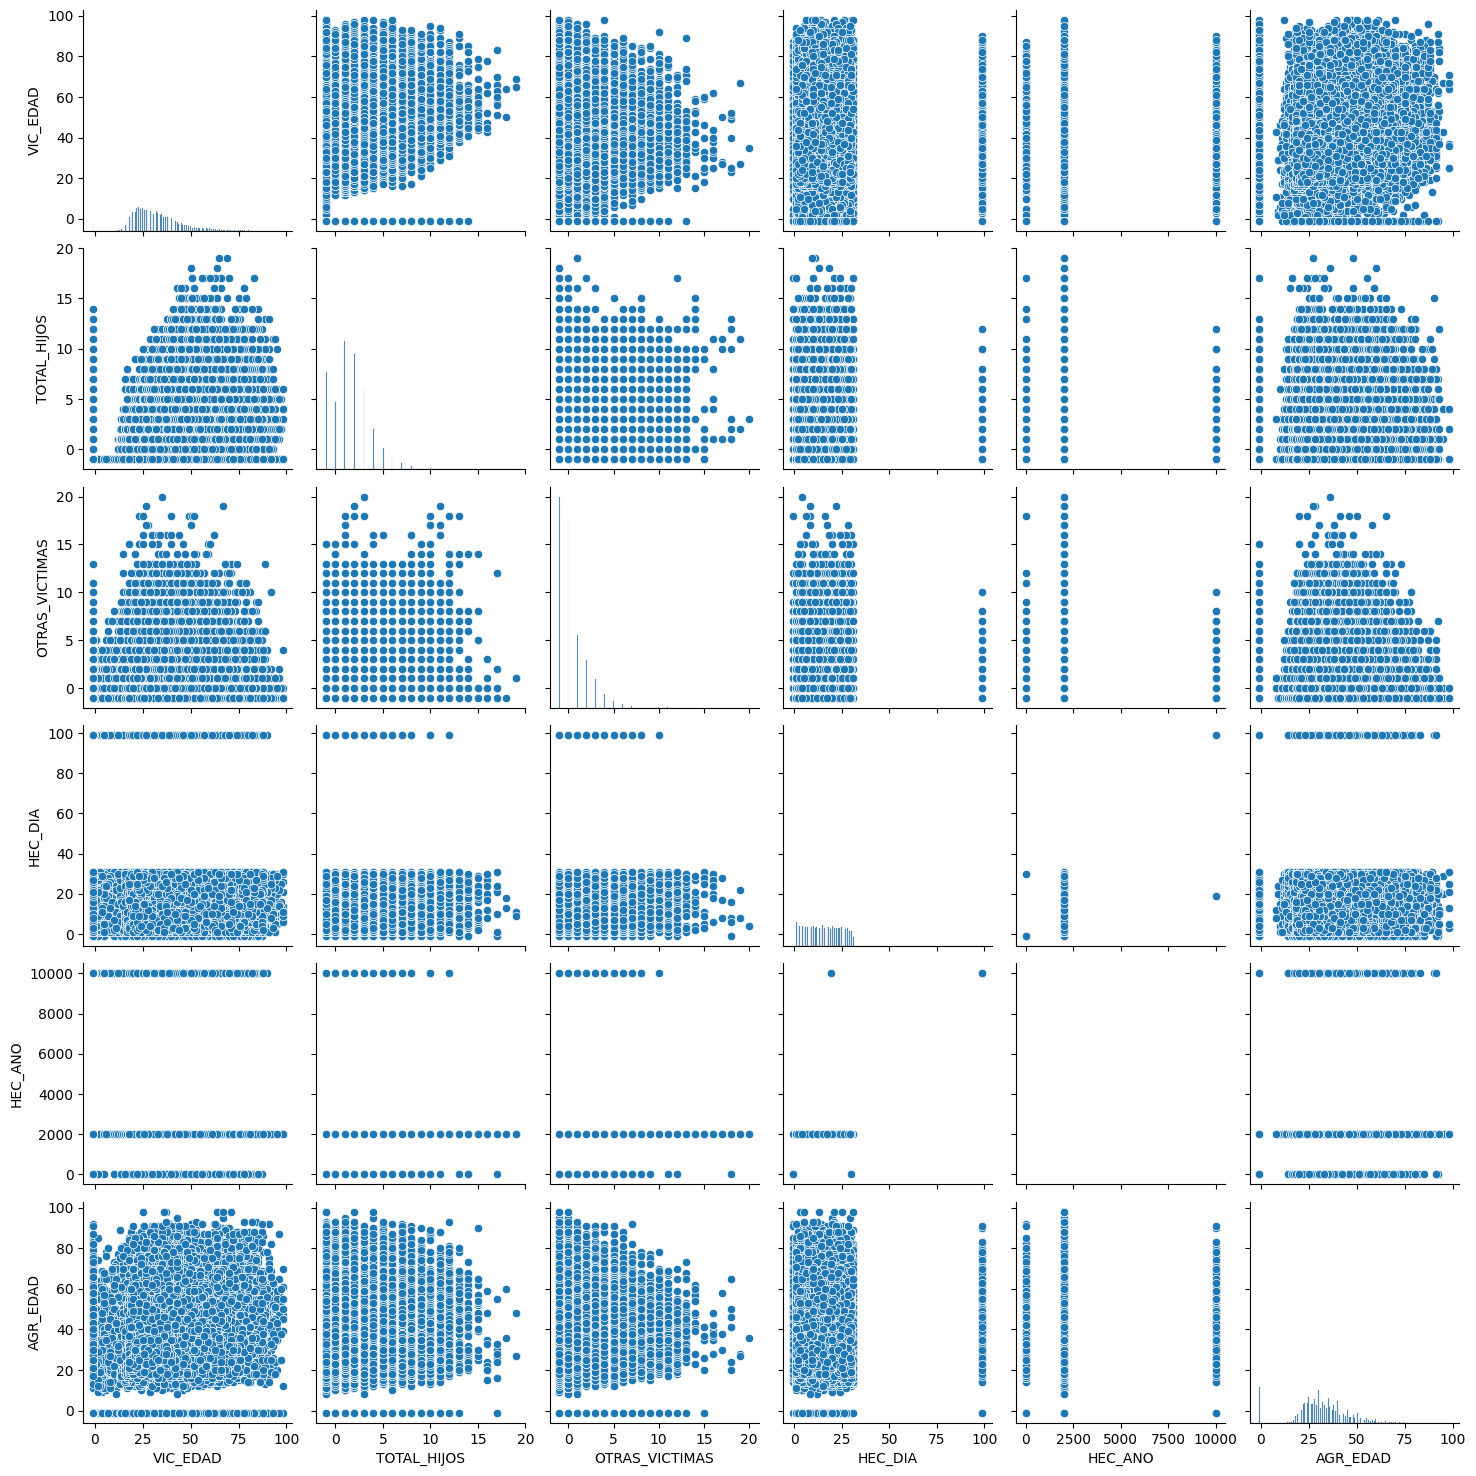

In [23]:
sns.pairplot(df.drop(columns=["Unnamed: 0"]))
plt.show()

# Exploración de Variables Cualitativas

In [4]:
#df.info()
cualitativas=["VIC_SEXO","VIC_ESCOLARIDAD","VIC_EST_CIV","VIC_GRUPET","VIC_TRABAJA", "VIC_DISC","VIC_REL_AGR","INST_DENUN_HECHO","MEDIDAS_SEGURIDAD"]

def tabla_frecuencias(df, columnas=None, incluir_nan=False):

    if columnas is None:
        columnas = df.select_dtypes(include=['object', 'category']).columns

    resultados = {}
    for col in columnas:
        serie = df[col]

        freq_abs = serie.value_counts(dropna=not incluir_nan)
        freq_rel = serie.value_counts(normalize=True, dropna=not incluir_nan)
        freq_acum = freq_rel.cumsum()

        tabla = pd.DataFrame({
            "Frecuencia": freq_abs,
            "Frecuencia Relativa": freq_rel,
            "Frecuencia Acumulada": freq_acum
        })

        resultados[col]=tabla
    return resultados

df_cual=tabla_frecuencias(df, columnas=cualitativas)#Diccionario de Dataframes de variables cualitativas


In [5]:
df_cual["INST_DENUN_HECHO"]

,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada
INST_DENUN_HECHO,,,
Organismo Judicial,205702,0.572989,0.572989
Policia Nacional Civil,121610,0.338748,0.911738
Ministerio Público,22593,0.062933,0.974671
Procuraduría de los Derechos Humanos,4740,0.013203,0.987875
Procuraduría General de la Nación,4263,0.011875,0.999749
Bufete Popular,90,0.000251,1.000000


Se observa que la institución con que atiende el mayor número de denuncias de esta índole es el Organismo Judicial (205702 denuncias registradas- 57.29%), seguida de la Policía Nacional Civil (121610 denuncias- 33.87%). El Bufete Popular es aquel que atiende la menor cantidad de estas denuncias (90 denuncias- 0.025%).

In [ ]:
df_cual["MEDIDAS_SEGURIDAD"]

,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada
MEDIDAS_SEGURIDAD,,,
Si,188844,0.526031,0.526031
Desconocido,166731,0.464434,0.990465
No,3423,0.009535,1.000000


Se observa que la mayoría de las denuncias tienen medidas de seguridad (188844 denuncias- 52.60%), mientras que se desconoce si las tienen 166731 denuncias (46.44%). 3423 denuncias no tienen medidas de seguridad (0.95%).

In [ ]:
df_cual["VIC_DISC"]

,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada
VIC_DISC,,,
No,336655,0.937763,0.937763
Desconocido,19161,0.053374,0.991136
Si,3182,0.008864,1.000000


Se observa que la mayoría de las víctimas registradas en la base de datos no sufren de alguna discapacidad (336655 víctimas- 93.77%). Se desconoce si las sufren 19161 de las víctimas registradas (5.33%). 0.88% de las víctimas sufren de alguna discapacidad

In [ ]:
df_cual["VIC_ESCOLARIDAD"]

,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada
VIC_ESCOLARIDAD,,,
Primaria,147608,0.411167,0.411167
Ninguna,75818,0.211193,0.622360
Diversificado,62891,0.175185,0.797545
Básico,53114,0.147951,0.945496
Universidad,10494,0.029231,0.974727
Desconocido,9073,0.025273,1.000000


Se observa que, respecto a la escolaridad de las víctimas, la mayor parte de ellas eran estudiantes de primaria (147608- 41.11%), seguidos de aquellas víctimas que no tenían grado escolar alguno (75818- 21.11%). Aquellas víctimas cuyo grado escolar era desconocido representa el menor conjunto de la base de datos, siendo 9073 víctimas (alrededor del 2.52%) con escolaridad desconocida.

In [ ]:
df_cual["VIC_EST_CIV"]

,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada
VIC_EST_CIV,,,
Casado,156344,0.435501,0.435501
Unido,88848,0.247489,0.682990
Soltero,65858,0.183449,0.866439
Desconocido,39822,0.110925,0.977365
Otro,5441,0.015156,0.992521
Viudo,2685,0.007479,1.000000


El estado civil de la mayoría de las víctimas es de Casado (156344- 43.55%) seguido de los que tienen estado civil Unido (88848- 24.74%). Aquellos con menor frecuencia tienen estado civil de Viudo (2685- 0.7479%)

In [ ]:
df_cual["VIC_GRUPET"]

,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada
VIC_GRUPET,,,
Ladino,203445,0.566702,0.566702
Maya,109607,0.305314,0.872016
Otro,38752,0.107945,0.979961
Desconocido,6142,0.017109,0.997070
Xinca,542,0.001510,0.998579
Garifuna,510,0.001421,1.000000


La mayoría de las víctimas de la base de datos son se etnia Ladino (203445- 56.67%), seguidos de aquellos de etnia Maya (109607- 30.53%). La etnia que menos víctimas ha reportado ha sido la Garifuna (510- 0.14%)

In [ ]:
df_cual["VIC_REL_AGR"]

,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada
VIC_REL_AGR,,,
Esposos(a),110340,0.307355,0.307355
Conviviente,110226,0.307038,0.614393
Ex-cónyuges,51314,0.142937,0.757330
Otro pariente,30966,0.086257,0.843587
Hermanos(as),15315,0.042660,0.886247
Padres/madres,14511,0.040421,0.926668
Esposos(as),12863,0.035830,0.962498
Hijos(as),7703,0.021457,0.983955
Suegros(as),4136,0.011521,0.995476


En cuanto a la relación de la víctima con el agresor, se observa que la mayoría eran Esposos (110340- 30.73%), seguido de aquellos que eran Convivientes (110226- 30.70%). La menor parte de estos fue agresión hacia los Nietos (446- 0.12%).

In [ ]:
df_cual["VIC_SEXO"]

,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada
VIC_SEXO,,,
Mujeres,322579,0.898554,0.898554
Hombres,36419,0.101446,1.000000


Se observa que el 89.85% de la población estudiada han sido mujeres, mientras que el restante 10.14% han sido hombres.

In [ ]:
df_cual["VIC_TRABAJA"]

,Frecuencia,Frecuencia Relativa,Frecuencia Acumulada
VIC_TRABAJA,,,
No,238723,0.664970,0.664970
Si,117743,0.327977,0.992947
Desconocido,2532,0.007053,1.000000


Se observa que la mayor parte de las víctimas no trabajaban (238723- 66.49%), mientras que los que sí trabajan representan el 32.79%. Son 2532 (0.7053%) víctimas de las que se desconoce si trabajan o no.